<a href="https://colab.research.google.com/github/rhmdftrianto/-A2_2109116027_POSTTEST2-DATMIN/blob/main/2109116027_Rahmad_Fitrianto_POSTTEST2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

### Impor data ke dalam sebuah dataframe

In [ ]:
import pandas as pd

df1 = pd.read_csv('https://raw.githubusercontent.com/rhmdftrianto/-A2_2109116027_POSTTEST2-DATMIN/main/POSTTEST2%20DATMIN/dataset_market_basket.csv')

### Menampilkan data yang telah ditabulasi dan disimpan ke dalam dataframe

In [ ]:
df1

,whole milk,pasrty,salty snack,sausage,semi-finished bread,yogurt,soda,pickled vegetables,canned beer,misc. beverages,...,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Menghitung total dari setiap item yang ada pada dataframe

In [ ]:
df1.sum()

whole milk             5
pasrty                 1
salty snack            1
sausage                4
semi-finished bread    1
yogurt                 1
soda                   3
pickled vegetables     1
canned beer            1
misc. beverages        1
hygiene articles       1
rolls/buns             3
frankfurter            2
whipped/sour cream     1
curd                   1
beef                   1
white bread            1
butter                 1
frozen vegetables      1
other vegetables       1
tropical fruit         1
sugar                  1
butter milk            1
specialty chocolate    1
frozen meals           1
dental care            1
root vegetables        1
detergent              1
dish cleaner           1
cling film/bags        1
dtype: int64

### Menampilkan kolom yang terdapat pada dataframe

In [ ]:
print("List Kolom :\n")
for col in df1.columns:
  print(col)

List Kolom :

whole milk
pasrty
salty snack
sausage
semi-finished bread
yogurt
soda
pickled vegetables
canned beer
misc. beverages
hygiene articles
rolls/buns
frankfurter
whipped/sour cream
curd
beef
white bread
butter
frozen vegetables
other vegetables
tropical fruit
sugar
butter milk
specialty chocolate
frozen meals
dental care
root vegetables
detergent
dish cleaner
cling film/bags


### Menentukan kombinasi barang yang mungkin terjadi

In [25]:
from itertools import permutations #Library untuk buat kombinasi barang
comb_all = list(permutations(df1.columns, 2)) # untuk menyimpan seluruh kemungkinan kombinasi barang
comb_all # untuk menampilkan keseluruhan hasil kombinasi

[('whole milk', 'pasrty'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'pickled vegetables'),
 ('whole milk', 'canned beer'),
 ('whole milk', 'misc. beverages'),
 ('whole milk', 'hygiene articles'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'frankfurter'),
 ('whole milk', 'whipped/sour cream'),
 ('whole milk', 'curd'),
 ('whole milk', 'beef'),
 ('whole milk', 'white bread'),
 ('whole milk', 'butter'),
 ('whole milk', 'frozen vegetables'),
 ('whole milk', 'other vegetables'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', 'sugar'),
 ('whole milk', 'butter milk'),
 ('whole milk', 'specialty chocolate'),
 ('whole milk', 'frozen meals'),
 ('whole milk', 'dental care'),
 ('whole milk', 'root vegetables'),
 ('whole milk', 'detergent'),
 ('whole milk', 'dish cleaner'),
 ('whole milk', 'cling film/bags'),
 ('pasrty', 'whole milk'),
 ('pasrty', 'salty snack'),
 ('

### Menentukan kombinasi item yang ada pada dataframe

In [26]:
hasil = [] # Menyimpan data dalam bentuk list
for comb_item in comb_all: # Mengulangi pembacaan dataset
  if len(df1[(df1[comb_item[0]]==1) & (df1[comb_item[1]]==1)]) >0: # Menentukan apakah kombinasi tersebut ada atau tidak
    hasil.append(comb_item) # Menyimpan hasil pengecekan dalam bentuk tuple didalam list
hasil # Menampilkan hasil

[('whole milk', 'pasrty'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'butter'),
 ('pasrty', 'whole milk'),
 ('pasrty', 'salty snack'),
 ('salty snack', 'whole milk'),
 ('salty snack', 'pasrty'),
 ('sausage', 'whole milk'),
 ('sausage', 'semi-finished bread'),
 ('sausage', 'yogurt'),
 ('sausage', 'hygiene articles'),
 ('sausage', 'rolls/buns'),
 ('semi-finished bread', 'whole milk'),
 ('semi-finished bread', 'sausage'),
 ('semi-finished bread', 'yogurt'),
 ('yogurt', 'whole milk'),
 ('yogurt', 'sausage'),
 ('yogurt', 'semi-finished bread'),
 ('soda', 'whole milk'),
 ('soda', 'pickled vegetables'),
 ('soda', 'frankfurter'),
 ('soda', 'whipped/sour cream'),
 ('pickled vegetables', 'soda'),
 ('canned beer', 'misc. beverages'),
 ('misc. beverages', 'canned beer'),
 ('hygiene articles', 'sausage'),
 ('rolls/buns', 'whole milk'),
 ('rolls

### Menghitung jumlah kombinasi tiap - tiap item set pada dataframe

In [20]:
hasil_akhir = {} # Menyimpan data dalam bentuk dictionary
for itemset in hasil:  # Mengulangi pembacaan dataset
  banyak_data= len(df1[
      (df1[itemset[0]]==1) & (df1[itemset[1]]==1) # Menentukan berapa jumlah kemunculan kombinasi dan menyimpannya dalam sebuah variabel
      ])
  hasil_akhir[str(itemset)] = banyak_data # Menambahkan hasil penentuan ke dalam dictionary
hasil_akhir # Menampilkan hasil

{"('whole milk', 'pasrty')": 1,
 "('whole milk', 'salty snack')": 1,
 "('whole milk', 'sausage')": 2,
 "('whole milk', 'semi-finished bread')": 1,
 "('whole milk', 'yogurt')": 1,
 "('whole milk', 'soda')": 1,
 "('whole milk', 'rolls/buns')": 1,
 "('whole milk', 'butter')": 1,
 "('pasrty', 'whole milk')": 1,
 "('pasrty', 'salty snack')": 1,
 "('salty snack', 'whole milk')": 1,
 "('salty snack', 'pasrty')": 1,
 "('sausage', 'whole milk')": 2,
 "('sausage', 'semi-finished bread')": 1,
 "('sausage', 'yogurt')": 1,
 "('sausage', 'hygiene articles')": 1,
 "('sausage', 'rolls/buns')": 2,
 "('semi-finished bread', 'whole milk')": 1,
 "('semi-finished bread', 'sausage')": 1,
 "('semi-finished bread', 'yogurt')": 1,
 "('yogurt', 'whole milk')": 1,
 "('yogurt', 'sausage')": 1,
 "('yogurt', 'semi-finished bread')": 1,
 "('soda', 'whole milk')": 1,
 "('soda', 'pickled vegetables')": 1,
 "('soda', 'frankfurter')": 1,
 "('soda', 'whipped/sour cream')": 1,
 "('pickled vegetables', 'soda')": 1,
 "('can

###Melihat Banyaknya Transaksi

In [ ]:
len(df1)

19

### Menghitung Support

In [ ]:
for item,ab in hasil_akhir.items(): # Untuk melakukan perulangan pembacaan dataset pada tiap - tiap kombinasi itemnya
    support = ab/len(df1)*100 # Menghitung support pada tiap tiap kombinasi item
    print(f"{item} support = {support:.3f}%") # Menampilkan  nilai support

('whole milk', 'pasrty') support = 5.263%
('whole milk', 'salty snack') support = 5.263%
('whole milk', 'sausage') support = 10.526%
('whole milk', 'semi-finished bread') support = 5.263%
('whole milk', 'yogurt') support = 5.263%
('whole milk', 'soda') support = 5.263%
('whole milk', 'rolls/buns') support = 5.263%
('whole milk', 'butter') support = 5.263%
('pasrty', 'whole milk') support = 5.263%
('pasrty', 'salty snack') support = 5.263%
('salty snack', 'whole milk') support = 5.263%
('salty snack', 'pasrty') support = 5.263%
('sausage', 'whole milk') support = 10.526%
('sausage', 'semi-finished bread') support = 5.263%
('sausage', 'yogurt') support = 5.263%
('sausage', 'hygiene articles') support = 5.263%
('sausage', 'rolls/buns') support = 10.526%
('semi-finished bread', 'whole milk') support = 5.263%
('semi-finished bread', 'sausage') support = 5.263%
('semi-finished bread', 'yogurt') support = 5.263%
('yogurt', 'whole milk') support = 5.263%
('yogurt', 'sausage') support = 5.263%


### Menghitung Confidence

In [ ]:
for item,ab in hasil_akhir.items(): # Untuk melakukan perulangan pembacaan dataset pada tiap - tiap kombinasi itemnya
  # A -> B 
  i = eval(item) # Ubah ke list dari string
  confidence = ab/df1[i[0]].sum()*100 # Menghitung confidence pada tiap tiap kombinasi item dan menampilkannya
  print(f"{i[0]}->{i[1]}  Confidence = {confidence:.1f}%") # Menampilkan hasil confidence

whole milk->pasrty  Confidence = 20.0%
whole milk->salty snack  Confidence = 20.0%
whole milk->sausage  Confidence = 40.0%
whole milk->semi-finished bread  Confidence = 20.0%
whole milk->yogurt  Confidence = 20.0%
whole milk->soda  Confidence = 20.0%
whole milk->rolls/buns  Confidence = 20.0%
whole milk->butter  Confidence = 20.0%
pasrty->whole milk  Confidence = 100.0%
pasrty->salty snack  Confidence = 100.0%
salty snack->whole milk  Confidence = 100.0%
salty snack->pasrty  Confidence = 100.0%
sausage->whole milk  Confidence = 50.0%
sausage->semi-finished bread  Confidence = 25.0%
sausage->yogurt  Confidence = 25.0%
sausage->hygiene articles  Confidence = 25.0%
sausage->rolls/buns  Confidence = 50.0%
semi-finished bread->whole milk  Confidence = 100.0%
semi-finished bread->sausage  Confidence = 100.0%
semi-finished bread->yogurt  Confidence = 100.0%
yogurt->whole milk  Confidence = 100.0%
yogurt->sausage  Confidence = 100.0%
yogurt->semi-finished bread  Confidence = 100.0%
soda->whole

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

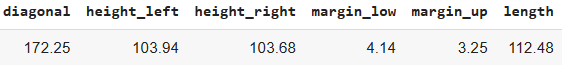
<!-- 1412 -->

### Mengimpor dan memasukkan dataset ke dalam dataframe

In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/rhmdftrianto/-A2_2109116027_POSTTEST2-DATMIN/main/POSTTEST2%20DATMIN/deteksi_uang_palsu.csv')

### Menampilkan dataframe dalam bentuk tabel

In [ ]:
df2

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


### Membuat tabel jarak berdasarkan data baru yang ingin ditambahkan

In [29]:
# import library numpy
import numpy as np

# membuat dataframe dari data baru
new_data = pd.DataFrame({'diagonal': [172.25],
                         'height_left': [103.94],
                         'height_right': [103.68],
                         'margin_low': [4.14],
                         'margin_up': [3.25],
                         'length': [112.48]})

# Menghitung jarak antara setiap baris dataframe utama dengan dataframe data baru
df2['distance'] = np.sqrt(
    (df2['diagonal'] - new_data['diagonal'].values[0])**2
    + (df2['height_left'] - new_data['height_left'].values[0])**2
    + (df2['height_right'] - new_data['height_right'].values[0])**2
    + (df2['margin_low'] - new_data['margin_low'].values[0])**2
    + (df2['margin_up'] - new_data['margin_up'].values[0])**2
    + (df2['length'] - new_data['length'].values[0])**2
)

# Menampilkan tabel jarak
print('\nTabel Jarak : ')
print(df2['distance'])


Tabel Jarak : 
0    0.671267
1    1.458321
2    0.834626
3    0.910934
4    1.312593
5    2.421281
6    1.741896
7    1.113463
8    1.722034
9    1.738217
Name: distance, dtype: float64


### 1. Menambahkan kolom jarak

In [36]:
# setting pandas agar bisa menampilkan seluruh kolom dibaris yang sesuai
pd.set_option('display.max_columns', None)

# Mengatur lebar tabel menjadi 200
pd.set_option('display.width', 200)

print(df2)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
1        True    171.66       103.68        103.41        4.35       3.33  113.74  1.458321
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934
4        True    171.79       104.57        104.04        4.26       3.15  113.46  1.312593
5       False    172.00       104.23        104.52        5.76       3.37  110.94  2.421281
6       False    171.56       104.03        103.93        5.47       3.50  111.67  1.741896
7       False    171.90       104.33        104.40        4.70       3.31  112.12  1.113463
8       False    171.84       104.06        104.10        4.87       3.25  111.04  1.722034
9       False    172.11       104.14        104.15        4.84       3.28  110.9

### 2. Mengurutkan data berdasarkan K jarak terdekat (dengan k = akar 2 dari banyak data)

In [18]:
# Mengurutkan data dari kecil ke besar
sorted = df2.sort_values('distance')

# Menentukan nilai k
k = int(np.sqrt(len(df2)))

# Menentukan data terdekat
data_terdekat = sorted.head(k)

# Menampilkan data terdekat
print(data_terdekat)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934


### 3. Menentukan hasil prediksi berdasarkan label terbanyak

In [43]:
# Mengimpor library sklearn untuk menggunakan algoritma knn
from sklearn.neighbors import KNeighborsClassifier

# Split data menjadi data training dan data testing
X_train = df2.drop(columns=['is_genuine','distance'],axis=1)
y_train = df2['is_genuine']

# inisiasi data baru menjadi data tes
test_data = new_data

# membuat variabel knn yang berisikan algoritma KNN dengan nilai K = akar 2 dari banyak data
knn = KNeighborsClassifier(n_neighbors=k)

# melatih knn dengan data training
knn.fit(X_train, y_train)

# memprediksi hasil
prediksi = knn.predict(test_data)
print("\nDari penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : "+ ' '.join(map(str, prediksi)))


Dari penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : True


# (3) Analisis

> Nama : Rahmad Fitrianto

> Nim : 2109116027


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

##Judul

### Mengeksplorasi Empati, Kesehatan Mental, dan Kelelahan Mahasiswa Kedokteran di Swiss


## Business Understanding

Kumpulan data ini mengeksplorasi empati, kesehatan mental, dan kelelahan mahasiswa kedokteran di Swiss. Itu mengumpulkan informasi demografis penting serta data yang dilaporkan sendiri dan hasil dari tes psikologis untuk memberikan gambaran komprehensif tentang kondisi mental siswa di bidang medis. Melalui penelitian ini, kami berharap untuk mendapatkan pemahaman yang lebih baik tentang bagaimana menjadi seorang mahasiswa kedokteran dapat mempengaruhi kesehatan dan kesejahteraan. Dengan melihat faktor individu yang dapat berkontribusi pada hasil yang berbeda, kita dapat berupaya meningkatkan sistem pendidikan untuk kepentingan siswa dan pasien mereka nantinya.

## Data Understanding



#### Collect Initial Data

Dataset Empati Kesehatan Mental dan Kelelahan Mahasiswa Kedokteran di Swiss didapatkan dari website resmi kaggle dan dapat dilihat pada link berikut : 
https://www.kaggle.com/datasets/thedevastator/medical-student-mental-health


In [44]:
# Import data ke dalam sebuah dataframe dengan nama df3

import pandas as pd
df3 = pd.read_csv('https://raw.githubusercontent.com/rhmdftrianto/-A2_2109116027_POSTTEST2-DATMIN/main/POSTTEST2%20DATMIN/Data%20Carrard%20et%20al.%202022%20MedTeach.csv')

#### Describe Data

Dataset yang digunakan memiliki 886 baris dan 20 kolom.

Dalam bagian ini, akan ditampilkan seluruh data Mahasiswa Swiss beserta deskripsi dari setiap kolom. Selanjutnya, data tersebut akan divisualisasikan agar dapat lebih mudah dipahami.

In [45]:
# Menampilkan data 
df3

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,2,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,4,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,9,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,10,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,13,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,14,46,22,14,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,1781,21,2,1,1,1,0,45,3,0,106,63,39,28,0.619048,41,39,23,4,34
882,1785,20,2,2,1,0,0,13,3,0,113,67,40,21,0.809524,26,41,17,5,24
883,1787,19,1,1,1,0,0,50,5,0,100,50,31,24,0.547619,14,45,15,8,31
884,1789,24,5,2,1,0,0,20,2,1,120,64,39,21,0.785714,33,58,22,15,19


In [46]:
print("Daftar kolom yang ada pada dataframe :")
for col in df3.columns:
  print(col)

Daftar kolom yang ada pada dataframe :
id
age
year
sex
glang
part
job
stud_h
health
psyt
jspe
qcae_cog
qcae_aff
amsp
erec_mean
cesd
stai_t
mbi_ex
mbi_cy
mbi_ea


Penjelasan Kolom

1. id: 	Nomor identitas peserta.

2. age: Usia pada kuesioner.

3. year: Tahun Kurikulum.

4. sex: Jenis Kelamin.

5. glang: Bahasa yang digunakan.

6. part: Status Kemitraan.

7. job: Pekerjaan.

8. stud_h: Jam belajar per minggu.

9. health: Kepuasan dengan kesehatan.

10. psyt: Konsultasi psikiater

11. jspe: Skor empati total JSPE.

12. qcae_cog: Skor empati kognitif QCAE.

13. qcae_aff: Skor empati afektif QCAE.

14. amsp: Skor total AMSP.

15. erec_mean: Nilai rata-rata jawaban yang benar.

16. cesd: Skor total CES-D

17. stai_t: Skor STAI

18. mbi_ex: Kelelahan Emosi MBI

19. mbi_cy: Sinisme MBI

20. mbi_ea: Efikasi Akademik MBI

#### Explore Data

Beberapa kolom data akan divisualisasikan untuk menjelajahi data lebih lanjut lagi (menggunakan scatterplot dan countplot).

Pada countplot, beberapa kolom akan dibandingkan secara satu - persatu dengan kolom 'Health' untuk melihat apakah hubungan antara kolom - kolom ini berbanding lurus dengan kolom 'Health' atau sebaliknya


<Axes: xlabel='psyt', ylabel='count'>

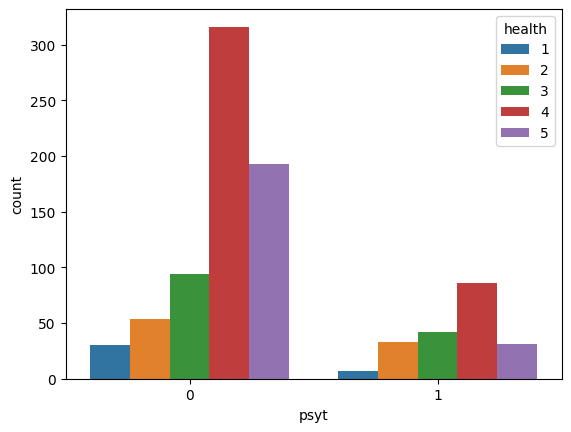

In [60]:
import seaborn as sns

sns.countplot(data=df3,x="psyt",hue="health")

Sumbu x ini menunjukkan jumlah responden yang telah melakukan konsultasi psikiater, yang kemungkinan dapat mencerminkan tingkat kesulitan mental atau stres yang dialami oleh responden.

Sementara itu, hue pada visualisasi ini adalah kategori "health", yang menunjukkan status kesehatan responden. Dengan membagi grafik berdasarkan hue, kita dapat melihat bagaimana kesehatan responden yang melakukan konsultasi psikiater dibandingkan dengan mereka yang tidak melakukan konsultasi psikiater.

<Axes: xlabel='job', ylabel='count'>

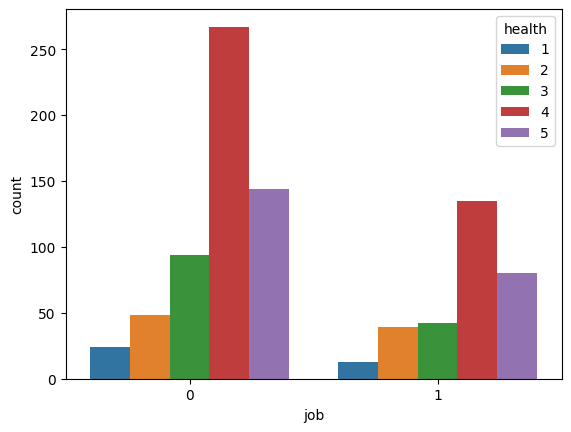

In [59]:
sns.countplot(data=df3,x="job",hue="health")

Pada visualisasi tersebut, sumbu x merepresentasikan variabel "job" yang menunjukkan jenis pekerjaan yang dimiliki responden. Sedangkan hue merepresentasikan variabel "health" yang menunjukkan tingkat kepuasan responden dengan kesehatannya sendiri. Visualisasi tersebut bertujuan untuk menunjukkan hubungan antara jenis pekerjaan yang dimiliki dengan tingkat kepuasan kesehatan responden. Dengan menggunakan hue, kita dapat melihat jumlah responden yang puas dan tidak puas dengan kesehatannya masing-masing berdasarkan jenis pekerjaannya.

<class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>


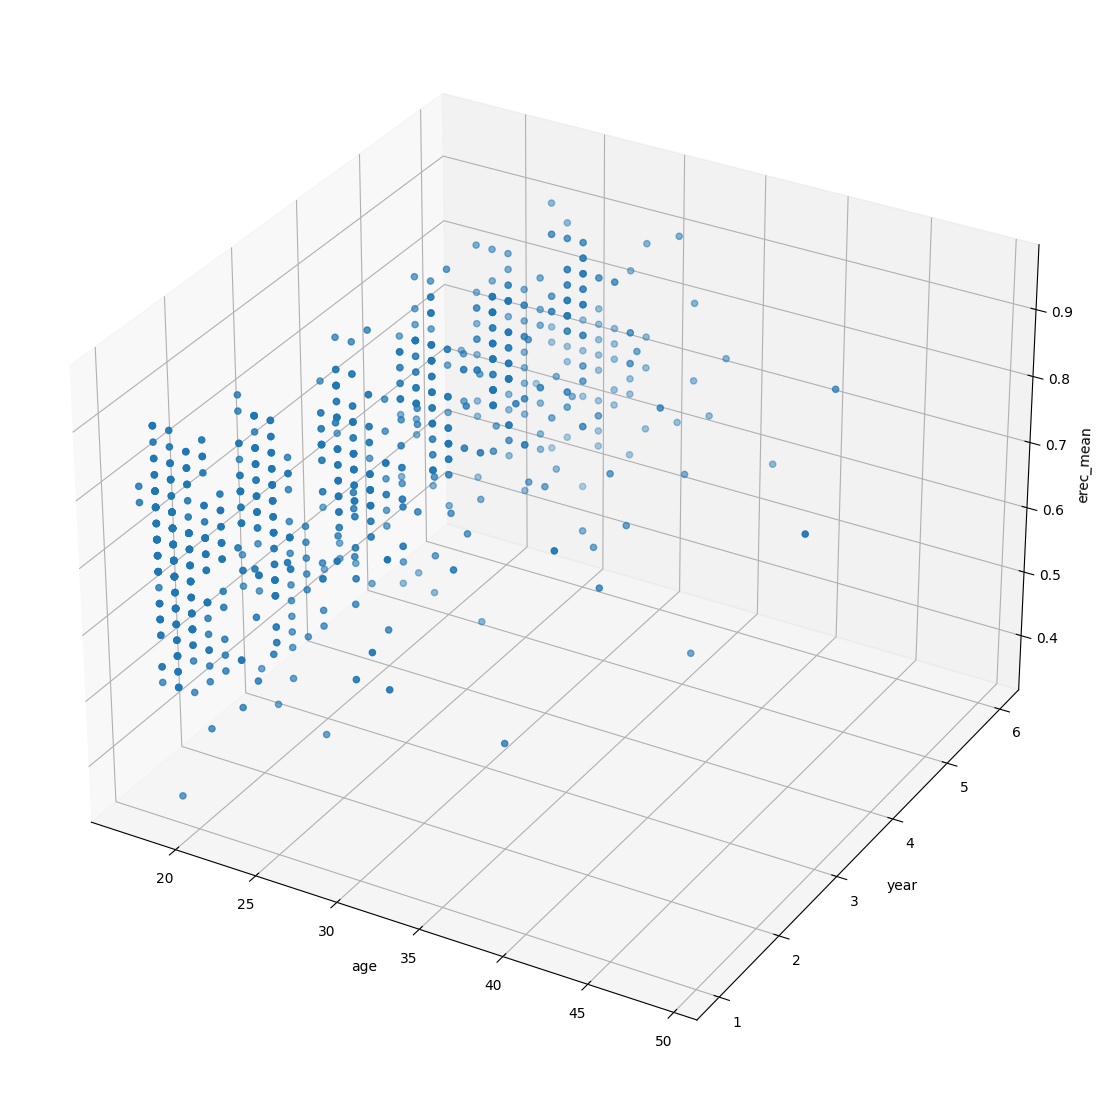

In [63]:
import matplotlib.pyplot as plot

plot.figure(figsize=(15,14))
axes = plot.axes(projection='3d')
print(type(axes))
axes.scatter3D(df3['age'],df3['year'],df3['erec_mean'])

axes.set_xlabel('age')
axes.set_ylabel('year')
axes.set_zlabel('erec_mean')
plot.show()

Sumbu x merupakan kategori umur mahasiswa. Sedangkan sumbu y merupakan tahun studi kurikulum. Dan sumbu z merupakan nilai rata - rata jawaban yang benar.

Berdasarkan visualisasi menggunakan matplotlib, terlihat bahwa data yang dipresentasikan memiliki pola kenaikan nilai rata-rata jawaban yang benar seiring dengan peningkatan tahun studi kurikulum. Selain itu, terlihat juga bahwa kategori umur responden tidak memberikan pengaruh yang signifikan terhadap nilai rata-rata jawaban yang benar.

Namun, perlu diingat bahwa visualisasi ini hanya memberikan gambaran awal dan belum dapat dijadikan sebagai kesimpulan akhir. Perlu dilakukan analisis lebih lanjut dan pengujian hipotesis untuk mengetahui apakah hubungan antara tahun studi kurikulum dan nilai rata-rata jawaban yang benar benar signifikan atau tidak.


#### Verify Data Quality

Dilakukan verifikasi kualitas data dengan cara memeriksa data berdasarkan beberapa indikator kualitas data, seperti kelengkapan data, validitas data dan duplikasi data.

##### Validitas Data

Data - data yang tercakup pada dataframe di atas valid, karena berdasarkan sumber datanya.

Link Dataset : https://www.kaggle.com/datasets/thedevastator/medical-student-mental-health

##### Duplikasi Data

In [53]:
is_duplicated = df3.duplicated().any()

print("Status Duplikasi :",is_duplicated)

Status Duplikasi : False


Berdasarkan output di atas, data - data yang pada dataframe tidak memiliki duplikasi data, didukung oleh adanya kolom ID atau identifikasi kusioner agar data - data mereka tidak terlantar, tertukar, terduplikasi, dan masalah lainnya

## Data Preparation

#### Select Data

In [54]:
df3 = pd.read_csv('https://raw.githubusercontent.com/rhmdftrianto/-A2_2109116027_POSTTEST2-DATMIN/main/POSTTEST2%20DATMIN/Data%20Carrard%20et%20al.%202022%20MedTeach.csv')

Dataset yang digunakan pada tahap ini adalah sama, karena dataset internal Mahasiswa Kedokteran Swiss yang berasal dari sumber hanya data di atas

#### Clean Data

In [55]:
df3.isna().sum()

id           0
age          0
year         0
sex          0
glang        0
part         0
job          0
stud_h       0
health       0
psyt         0
jspe         0
qcae_cog     0
qcae_aff     0
amsp         0
erec_mean    0
cesd         0
stai_t       0
mbi_ex       0
mbi_cy       0
mbi_ea       0
dtype: int64

Berdasarkan output di atas, diketahui bahwa tidak terdapat nilai kosong atau nilai N/A pada dataframe sehingga dapat  disimpulkan bahwa data sudah clean dan lanjut ke proses Transform Data

#### Transform Data

In [56]:
df3 = pd.get_dummies(df3)
print(df3)


       id  age  year  sex  glang  part  job  stud_h  health  psyt  jspe  qcae_cog  qcae_aff  amsp  erec_mean  cesd  stai_t  mbi_ex  mbi_cy  mbi_ea
0       2   18     1    1    120     1    0      56       3     0    88        62        27    17   0.738095    34      61      17      13      20
1       4   26     4    1      1     1    0      20       4     0   109        55        37    22   0.690476     7      33      14      11      26
2       9   21     3    2      1     0    0      36       3     0   106        64        39    17   0.690476    25      73      24       7      23
3      10   21     2    2      1     0    1      51       5     0   101        52        33    18   0.833333    17      48      16      10      21
4      13   21     3    1      1     1    0      22       4     0   102        58        28    21   0.690476    14      46      22      14      23
..    ...  ...   ...  ...    ...   ...  ...     ...     ...   ...   ...       ...       ...   ...        ...   ...    

Output diatas menandakan bahwa dataset selesai di-transform dan dapat dilihat bahwa tidak ada perbedaan antara output transform data dengan output select data, hal ini disebabkan oleh value atau nilai pada dataframe bertipe numerik, sehingga saat dilakukan transform data ke tipe numerik, data tidak ada yang berubah

#### Data Reduction

In [57]:
data = df3.drop(columns=['id','year','glang','part','stud_h','jspe','amsp'])
data

,age,sex,job,health,psyt,qcae_cog,qcae_aff,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,18,1,0,3,0,62,27,0.738095,34,61,17,13,20
1,26,1,0,4,0,55,37,0.690476,7,33,14,11,26
2,21,2,0,3,0,64,39,0.690476,25,73,24,7,23
3,21,2,1,5,0,52,33,0.833333,17,48,16,10,21
4,21,1,0,4,0,58,28,0.690476,14,46,22,14,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,21,1,0,3,0,63,39,0.619048,41,39,23,4,34
882,20,2,0,3,0,67,40,0.809524,26,41,17,5,24
883,19,1,0,5,0,50,31,0.547619,14,45,15,8,31
884,24,2,0,2,1,64,39,0.785714,33,58,22,15,19


Berdasarkan analisis yang dilakukan, terdapat beberapa kolom pada dataset yang tidak terlalu diperlukan untuk mengurangi kompleksitas dan meningkatkan efisiensi analisis. Kolom - kolom tersebut ialah id, year, glang, part, stud_h, jspe, dan amsp.

#### Slicing Data

In [58]:
data = data.iloc[0:501,:]
data

,age,sex,job,health,psyt,qcae_cog,qcae_aff,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,18,1,0,3,0,62,27,0.738095,34,61,17,13,20
1,26,1,0,4,0,55,37,0.690476,7,33,14,11,26
2,21,2,0,3,0,64,39,0.690476,25,73,24,7,23
3,21,2,1,5,0,52,33,0.833333,17,48,16,10,21
4,21,1,0,4,0,58,28,0.690476,14,46,22,14,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,24,2,1,3,1,59,41,0.761905,10,47,16,12,24
497,23,1,1,4,0,64,40,0.738095,10,26,11,13,21
498,26,2,0,5,0,63,40,0.547619,7,39,17,7,26
499,18,2,0,4,0,58,35,0.738095,25,49,16,7,25


Dataset yang telah direduksi selanjutnya akan dipotong / slicing data, yaitu memilih sebagian kecil atau subset dari dataset yang digunakan untuk analisis atau pemodelan dengan tujuan untuk memudahkan analisis dan pemodelan dengan mengurangi kompleksitas dataset dan fokus pada variabel atau fitur yang paling relevan atau penting.

#### Split Data

In [64]:
from sklearn.model_selection import train_test_split
x = data.drop('health',axis=1)
y = data['health']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print("Data Latih Yang Akan Digunakan :\n",x_train)
print("Data Uji Yang Akan Digunakan :\n",x_test)

Data Latih Yang Akan Digunakan :
      age  sex  job  psyt  qcae_cog  qcae_aff  erec_mean  cesd  stai_t  mbi_ex  mbi_cy  mbi_ea
116   19    1    0     1        55        38   0.761905    50      77      30      19      20
45    29    1    0     0        66        41   0.880952    11      35      18      15      27
16    21    1    0     0        53        34   0.666667    25      56      21      10      27
463   26    1    0     0        67        37   0.619048    24      63      20      13      28
357   23    1    0     0        72        34   0.523810    10      33      28      16      21
..   ...  ...  ...   ...       ...       ...        ...   ...     ...     ...     ...     ...
106   19    2    0     0        60        36   0.761905    26      50      25      12      22
270   22    2    1     1        74        41   0.619048    31      65      21       4      24
348   23    1    0     0        50        32   0.714286     9      36      14       8      28
435   18    2    0     0  

Pada tahap splitting data, dataset akan dibagi menjadi data latih dan data uji dengan rasio jumlah 70 : 30 untuk menghindari overfitting yaitu sebuah kondisi di mana model yang dibangun terlalu kompleks dan terlalu "menyesuaikan" dengan data latih sehingga kinerja model pada data latih sangat baik, tetapi kinerja model pada data uji buruk.

## Kesimpulan

Berdasarkan penyelesaian struktur CRISP-DM, dapat disimpulkan bahwa data ini digunakan untuk mengeksplorasi topik tentang empati, kesehatan mental, dan kelelahan pada mahasiswa kedokteran di Swiss. Data ini terdiri dari 886 baris dan 20 kolom yang berisi informasi tentang identitas responden, karakteristik pribadi, dan hasil kuesioner yang berkaitan dengan topik tersebut. Pada tahap Business Understanding, tujuan analisis data telah ditetapkan yaitu untuk mengeksplorasi hubungan antara variabel-variabel yang ada dengan topik yang diteliti. Pada tahap Data Understanding, data telah dipahami secara umum dan dilakukan beberapa analisis deskriptif sederhana. Pada tahap Data Preparation, data telah dibersihkan dan dipersiapkan untuk tahap berikutnya. Selanjutnya, pada tahap Modeling, data dapat dianalisis dengan menggunakan metode atau algoritma tertentu sesuai dengan tujuan analisis data. Terakhir, pada tahap Evaluation, hasil analisis akan dievaluasi dan diberikan kesimpulan dan rekomendasi untuk diambil tindakan lebih lanjut.